In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [58]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

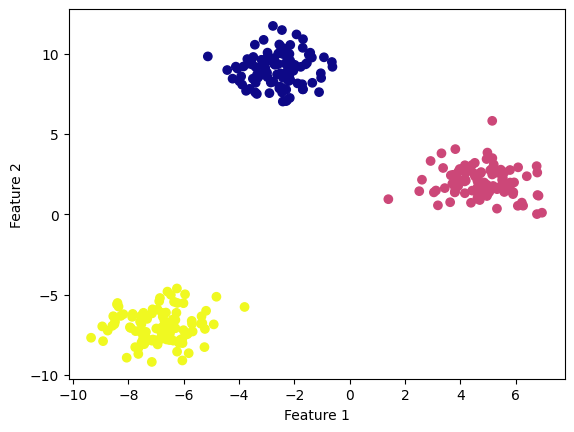

In [59]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [60]:
X.shape

(300, 2)

In [61]:
random_centroid_indexes = np.random.choice(X.shape[0], size=3, replace=False)
random_centroid_indexes

array([101, 188, 137])

In [62]:
blob_centroids = []

for index in random_centroid_indexes:
    blob_centroids.append(X[index])

blob_centroids = np.array(blob_centroids)

In [63]:
blob_centroids.shape

(3, 2)

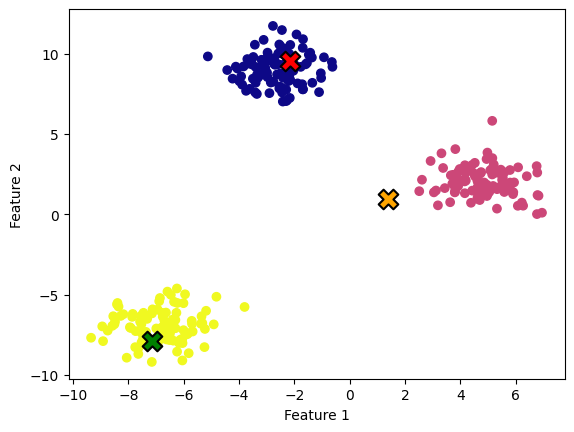

In [64]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

colors = ['red', 'orange', 'green']

for i, centroid in enumerate(blob_centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], s=200, marker='X', edgecolors='black', linewidths=1.5, label=f'Centroid {i+1}')

plt.show()

In [65]:
def has_coverged(old_centroids, new_centroids, tol=1e-4):
    shifts =np.linalg.norm(new_centroids-old_centroids, axis=1)
    return np.all(shifts<tol)

In [ ]:
for epochs in range(2000):
    categories=[[] for _ in range(3)]

    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i]-blob_centroids, axis=1)
        cluster_index = np.argmin(distances)

        categories[cluster_index].append(X[i])
        new_centroids = []
        for cat in categories:
            if(len(cat)>0):
                new_centroids.append(np.mean(cat, axis=0))
            else:
                new_centroids.append(np.zeros(X.shape[1]))

        new_centroids = np.array(new_centroids)
        if has_coverged(blob_centroids, new_centroids):
            break

        blob_centroids = new_centroids

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

colors = ['red', 'orange', 'green']

for i, centroid in enumerate(blob_centroids):
    plt.scatter(centroid[0], centroid[1], c=colors[i], s=200, marker='X', edgecolors='black', linewidths=1.5, label=f'Centroid {i+1}')

plt.show()